A notebook to process experimental results of ex2_prob_params.py. p(reject) as problem parameters are varied.

In [24]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import kgof.data as data
import kgof.glo as glo
import kgof.goftest as gof
import kgof.kernel as kernel
import kgof.plot as plot
import kgof.util as util

import scipy.stats as stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# font options
font = {
    #'family' : 'normal',
    #'weight' : 'bold',
    'size'   : 18
}

plt.rc('font', **font)
plt.rc('lines', linewidth=2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [26]:
def load_plot_vs_params(fname, xlabel='Problem parameter', show_legend=True):
    func_xvalues = lambda agg_results: agg_results['prob_params']
    ex = 2
    def func_title(agg_results):
        repeats, _, n_methods = agg_results['job_results'].shape
        alpha = agg_results['alpha']
        test_size = (1.0 - agg_results['tr_proportion'])*agg_results['sample_size']
        title = '%s. %d trials. test size: %d. $\\alpha$ = %.2g.'%\
            ( agg_results['prob_label'], repeats, test_size, alpha)
        return title
    #plt.figure(figsize=(10,5))
    results = plot.plot_prob_reject(
        ex, fname, func_xvalues, xlabel, func_title=func_title)
    
    plt.title('')
    plt.gca().legend(loc='best').set_visible(show_legend)
    #plt.grid(True)
        
    return results


def load_runtime_vs_params(fname, xlabel='Problem parameter', 
                      show_legend=True, xscale='linear', yscale='log'):
    func_xvalues = lambda agg_results: agg_results['prob_params']
    ex = 2
    def func_title(agg_results):
        repeats, _, n_methods = agg_results['job_results'].shape
        alpha = agg_results['alpha']
        title = '%s. %d trials. $\\alpha$ = %.2g.'%\
            ( agg_results['prob_label'], repeats, alpha)
        return title
    
    #plt.figure(figsize=(10,6))
    
    results = plot.plot_runtime(ex, fname,  
                                func_xvalues, xlabel=xlabel, func_title=func_title)
    
    plt.title('')
    plt.gca().legend(loc='best').set_visible(show_legend)
    #plt.grid(True)
    if xscale is not None:
        plt.xscale(xscale)
    if yscale is not None:
        plt.yscale(yscale)
        
    return results


In [27]:
# Gaussian mean difference. Vary dimension
# gmd_fname = 'ex2-gmd-me3_n500_rs100_pmi5.000_pma60.000_a0.050_trp0.50.p'
# gmd_results = load_plot_vs_params(gmd_fname, xlabel='$d$', show_legend=True)
# #plt.ylim([0.03, 0.1])
# #plt.savefig(bsg_fname.replace('.p', '.pdf', 1), bbox_inches='tight')

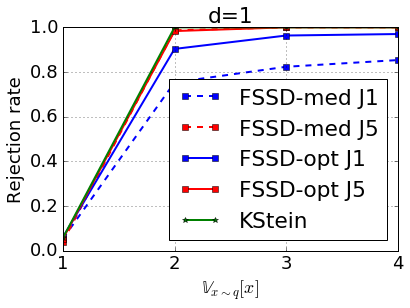

In [28]:
# Gaussian increasing variance
gvinc_d1_fname = 'ex2-gvinc_d1-me5_n500_rs300_pmi1.000_pma4.000_a0.050_trp0.50.p'
gvinc_d1_results = load_plot_vs_params(gvinc_d1_fname, xlabel='$\mathbb{V}_{x\sim q}[x]$', 
    show_legend=True)
plt.title('d=1')
# plt.ylim([0.02, 0.08])
# plt.xlim([0, 4])
#plt.legend(bbox_to_anchor=(1.70, 1.05))
#plt.savefig(gsign_fname.replace('.p', '.pdf', 1), bbox_inches='tight')

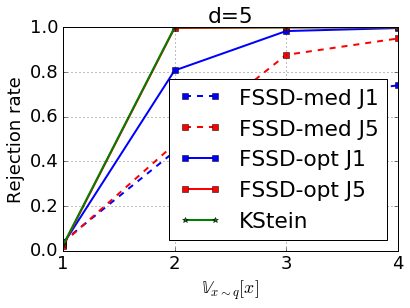

In [30]:
# Gaussian increasing variance
gvinc_d5_fname = 'ex2-gvinc_d5-me5_n500_rs300_pmi1.000_pma4.000_a0.050_trp0.50.p'
gvinc_d5_results = load_plot_vs_params(gvinc_d5_fname, xlabel='$\mathbb{V}_{x\sim q}[x]$', 
    show_legend=True)
plt.title('d=5')
# plt.ylim([0.02, 0.08])
# plt.xlim([0, 4])
#plt.legend(bbox_to_anchor=(1.70, 1.05))
#plt.savefig(gsign_fname.replace('.p', '.pdf', 1), bbox_inches='tight')

## Examine result files

In [ ]:
fname = 'ex2-gvinc_d1-me4_n500_rs50_pmi1.000_pma4.000_a0.050_trp0.50.p'
fpath = glo.ex_result_file(2, fname)
results = glo.pickle_load(fpath)

In [ ]:
job_results = results['job_results']
trial = 1
# #params x #methods numpy array
params_methods = job_results[trial]
method_ind = 2
param_ind = 0
trial_result = params_methods[param_ind, method_ind]
trial_result

In [ ]:
ds = data.DSIsotropicNormal(np.zeros(1), 1)
te = ds.sample(n=200, seed=2)
fssd_opt = trial_result['goftest']
fssd_opt.perform_test(te)

In [ ]:
fssd_opt.get_H1_mean_variance(te)

In [ ]:
fssd_opt.k.sigma2